In [9]:
import pandas as pd 
import numpy as np
import collections
import matplotlib.pyplot as plt
!ls

Clustering_Project.pdf  football_data.csv  Project-1.ipynb


In [10]:
df = pd.read_csv("football_data.csv", index_col="Unnamed: 0")
# df = df.astype(str)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [11]:
# info for all dataset columns_name, dataType, null_count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [12]:
df.shape

(18207, 88)

In [13]:
# describe of data min, max, mean, std values for all columns
df.describe(include='all')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,18207,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,17194,NaN,18207,164,164,NaN,NaN,651,679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/232692.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,Manchester United,https://cdn.sofifa.org/teams/2/light/10.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,11,NaN,1,1662,1662,NaN,NaN,33,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


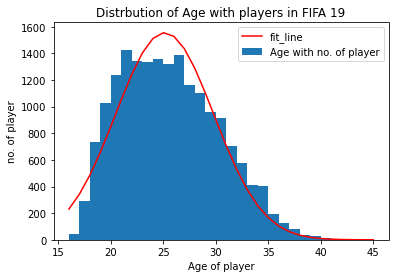

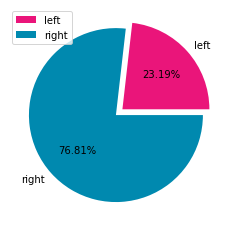

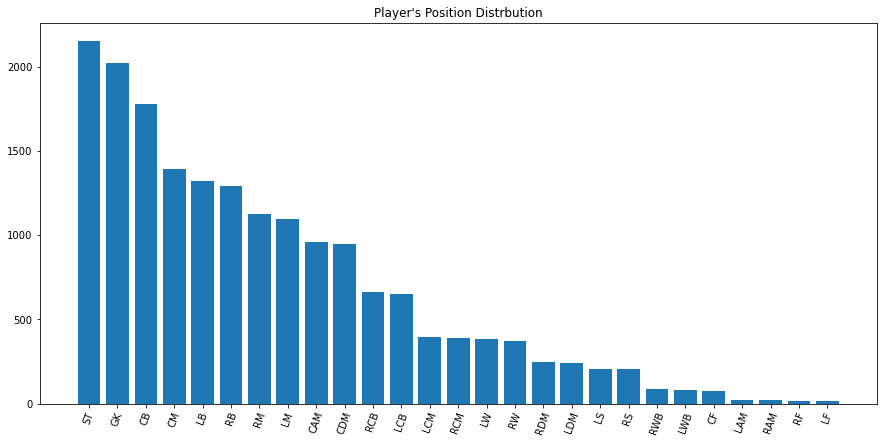

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


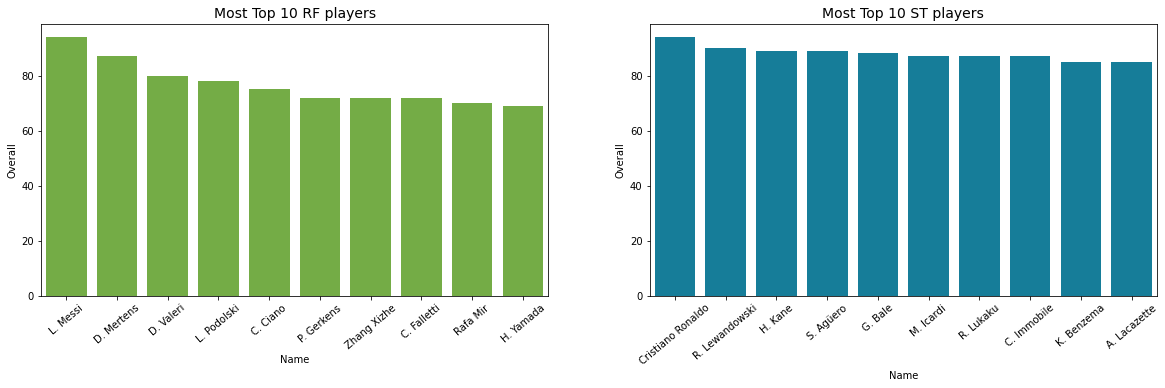

In [15]:
# Wage count in ranges
# ShotPower vs age, Position (SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression')
# Wage vs Value


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

X = df['Height'].tolist()

new = []

for i in X:
    if "'" in str(i):
        hh = i.split("'")
        hhh = int(hh[0])*12 + int(hh[1])
        new.append(hhh)
        

# plt.hist(new,bins=[65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81])
# plt.xlabel("height")
# plt.ylabel('freq')
# plt.show()


Y = df['Weight'].tolist()
# print(Y)

newY = []

for i in Y:
    if "lbs" in str(i):
        hh = i.split("l")
        hhh = int(hh[0])
        newY.append(hhh)
        
# plt.scatter(new,newY)
# plt.xlabel('Height')
# plt.ylabel('Weight')
# plt.show()



# # group data by Nationlity and sort it by number of player to get most country have player.
# national_player = df[['Nationality',"ID"]].groupby(by=['Nationality'],as_index=False).count().sort_values("ID",ascending=False)
# national_player.rename(columns = {'Nationality':"country", 'ID':'player_count'}, inplace = True)
# national_player = national_player.reset_index()
# national_player = national_player.drop(["index"], axis=1)
# national_player.head(10)
# print(national_player.head(10))



# # Slicing first 10 row form country player_count dataset
# player_count = national_player.iloc[0:10,1]
# national = national_player.iloc[0:10,0]

# # select seaborn style of chart to make display more good for eyes.
# plt.style.use("seaborn")
# # create bar chart between most 10 country and no. of player 
# plt.bar(national,player_count)
# plt.xticks(rotation=45)
# plt.title('Top 10 Country that have player in FIFA 19')
# plt.show()

############################ Everthing above this works, just uncomment

import scipy as sp

# slicing Age column and group it and count no. of player have same age for all age.
player_age = df[['Age',"ID"]].groupby(by=['Age'],as_index=False).count().sort_values("ID",ascending=False)
player_age.rename(columns = {'ID':'count'}, inplace = True)
player_age = player_age.reset_index().drop(["index"], axis=1)
player_age.head()



# display histogram of age for all player and fit normal distribution line for it.
_,bins,_ = plt.hist(df.Age,bins=df.Age.max()-df.Age.min(),label="Age with no. of player")
mu, sigma = sp.stats.norm.fit(df.Age)
best_fit_line = sp.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, df.shape[0] * best_fit_line,label="fit_line",color="red")

plt.title('Distrbution of Age with players in FIFA 19')
plt.ylabel("no. of player")
plt.xlabel("Age of player")
plt.legend()
plt.show()

preferred_foot = df.groupby("Preferred Foot")["Preferred Foot"].count()
preferred_foot
# plot pie chart to display the percentage for every foot that players preferred
plt.pie(preferred_foot, labels=["left","right"], explode=[0.1,0], autopct='%1.2f%%',colors=["#ea157a","#0089af"])
plt.legend()
plt.show()




# count number for every position in playground that have players and sorted it.
player_position = df[["Position","ID"]].groupby(by=['Position'],as_index=False).count().sort_values("ID",ascending=False)
player_position.rename(columns = {'ID':'count'}, inplace = True)
player_position = player_position.reset_index().drop(["index"], axis=1)
player_position.head()


# plot bar chart to display the number of players for every position with sorted.
plt.figure(figsize=(15,7))
plt.bar(player_position["Position"],player_position["count"])
plt.xticks(rotation=70)
plt.title("Player's Position Distrbution", color="black")
plt.show()

# get top 10 ST players in the world.
ST_position = df[df["Position"]=="ST"].sort_values("Overall",ascending=False)[["Name","Overall"]]
ST_position = ST_position.iloc[:10,:]

RF_position = df[df["Position"]=="RF"].sort_values("Overall",ascending=False)[["Name","Overall"]]
RF_position = RF_position.iloc[:10,:]

# function plot bar chart for top 10 player in selected position.
def draw(df, color, position, ax):
    plt.style.use('tableau-colorblind10')
    sns.barplot(df["Name"],df["Overall"],color=color , ax=ax).set_title("Most Top 10 " + position +" players", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40)

# plot 4 figures that display Top 10 player in ST, GK, LW, RF positions.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[20, 5])

draw(ST_position,"#0089af", "ST",axes[1])
draw(RF_position,"#72bd35", "RF",axes[0])
plt.show()



/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


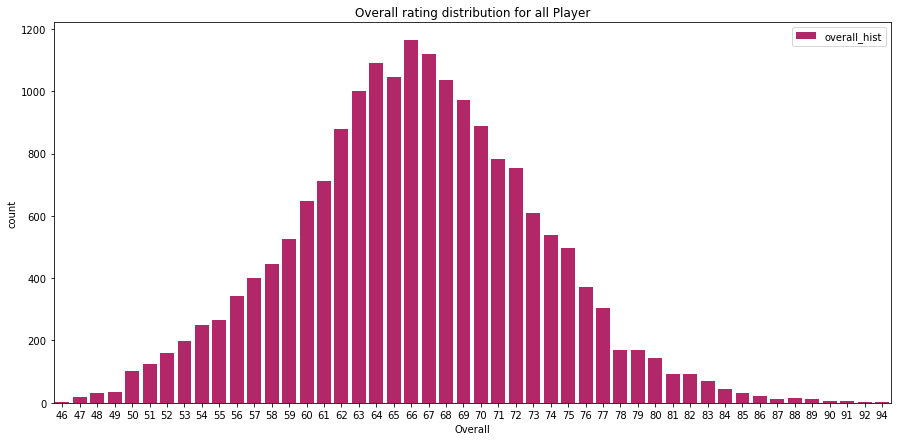

In [16]:
# plot the distribution of overall rating.
plt.figure(figsize=(15, 7))
sns.countplot(df.Overall, label="overall_hist",color="#c81067")
plt.title("Overall rating distribution for all Player")
plt.legend()
plt.show()

In [24]:
import plotly.graph_objects as go

attribute_dict = {"shooting" : ["Positioning","Finishing","ShotPower","LongShots","Volleys","Penalties"],
                  "passing" : ["Vision","Crossing","FKAccuracy","ShortPassing","LongPassing","Curve"],
                  "dribbling" : ["Agility","Balance", "Reactions", "BallControl", "Dribbling","Composure"],
                  "defending" : ["Interceptions", "HeadingAccuracy", "Marking", "StandingTackle","SlidingTackle"],
                  "physical" : ["Jumping", "Stamina", "Strength","Aggression"]}

# funcion that calcualte attribute for any player: need using player index
def calculate_attribute(dataframe,player_index):
    allcols = []
    
    for i in attribute_dict.values():
        allcols.extend(i) 
        
    player_observation = dataframe.loc[player_index,allcols].astype("int64")
    player_skills = []
    
    for i in attribute_dict.keys():
        lis = attribute_dict.get(i)
        player_skills.append(int(sum(player_observation[lis])/len(player_observation[lis])))

    return {i.upper()+": "+str(j)+"%":j for i,j in zip(attribute_dict.keys(),player_skills)}


# function plot radar diagram for any player, need player skills and player name.
def plot_player_radar(skills,player_name):
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=list(skills.values()),theta=list(skills.keys()),fill='toself',
                                  name=player_name, line_color='darkviolet',))

    fig.update_layout(polar=dict(radialaxis=dict(visible=False,range=[0,100])),showlegend=True)
    fig.show()

# draw attribute Details radar chart for RONALDO.

player_index = 0
player_skills = calculate_attribute(df,player_index)
plot_player_radar(player_skills,df.iloc[player_index]["Name"])

player_index = 1
player_skills = calculate_attribute(df,player_index)
plot_player_radar(player_skills,df.iloc[player_index]["Name"])

player_index = 2
player_skills = calculate_attribute(df,player_index)
plot_player_radar(player_skills,df.iloc[player_index]["Name"])



In [26]:
# player position in each line in playground.
position = {"deffender":["RB","LB","CB","LCB","RCB","RWB","RDM","CDM","LDM","LWB"],
             "midder":["RM","LM","CM","LCM","RCM","RAM","CAM","LAM"],
             "attacker":["RW","RF","CF","LF","LW","RS","ST","LS"]
            }
lineup = [3,4,3]

# function that get best squad in the world based on your Lineup.
def get_best_squad(lineup):
    best_squad = df[df.Position == "GK"].sort_values("Overall",ascending=False).iloc[0:1]
    for j, k in zip(position.keys(),range(3)):
        best = []
        for i in position.get(j):
            best.append(df[df.Position == i].sort_values(["Overall","Potential"], ascending=[False,False]).iloc[0])
        best = pd.DataFrame(best).sort_values(["Overall","Potential"], ascending=[False,False])
        best = best.iloc[0:lineup[k]]
        best_squad = pd.concat([best_squad, best])
    return best_squad

# get best squad on the world based on lineup which you select.
best_sqaud = get_best_squad(lineup)
best_sqaud.reset_index(inplace=True)
player_index = list(best_sqaud.loc[:,["index"]].values.reshape(11,))
best_sqaud.drop("index",axis=1,inplace=True)
best_sqaud



,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
3,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
6,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
7,231747,K. Mbappé,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
8,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
9,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


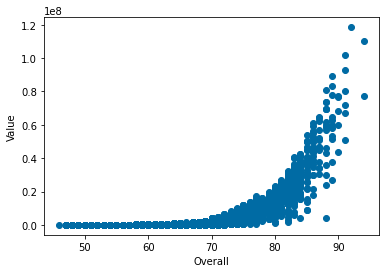

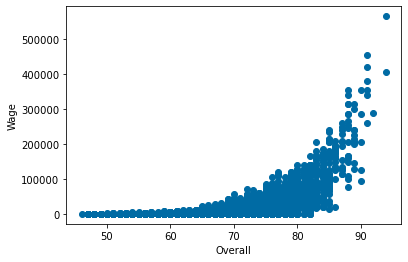

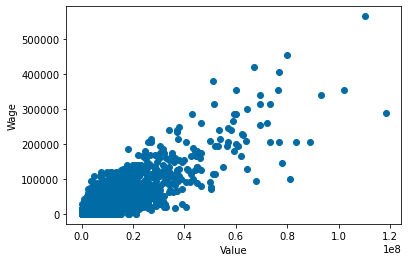

In [75]:

X = df['Value'].tolist()
Y = df['Overall'].tolist()
Z = df['Wage'].tolist()

Xnew = []
Ynew = []
Znew = []

for i in range(len(X)):
    
    xval = X[i]
    yval = Y[i]
    zval = Z[i]
    
    if '€' in xval: xval = xval[1:]
    if 'K' in xval: xval = float(xval[:-1])*1000
    elif 'M' in xval:
        xval = xval[:-1]
        xval = float(xval)*1000000

    
    if '€' in zval: zval = zval[1:]
    if 'K' in zval: zval = float(zval[:-1])*1000
    elif 'M' in zval:
        zval = zval[:-1]
        zval = float(zval)*1000000
        
    xval=float(xval)
    yval=float(yval)
    zval=float(zval)
    
    if xval!=0.0 and yval!=0.0 and zval!=0.0:
        Xnew.append(xval)
        Ynew.append(yval)
        Znew.append(zval)
    


plt.scatter(Ynew,Xnew)
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

plt.scatter(Ynew,Znew)
plt.xlabel('Overall')
plt.ylabel('Wage')
plt.show()

plt.scatter(Xnew,Znew)
plt.xlabel('Value')
plt.ylabel('Wage')
plt.show()



18207
74
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 1

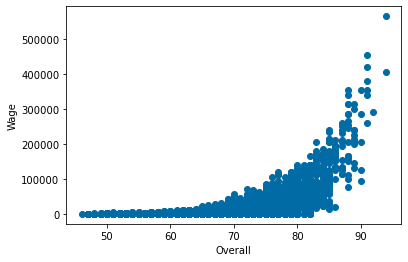

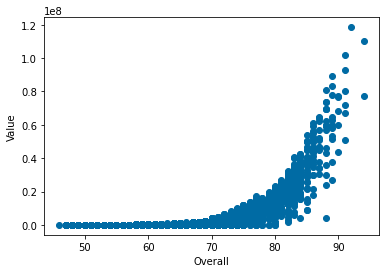

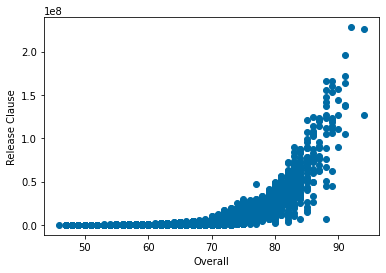

In [72]:
# Wage count in ranges
# ShotPower vs age, Position (SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression')
# Wage vs Value


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('football_data.csv')

toKeep=np.array([3,7,8,11,12,13,15,16,17,22,23])
for i in range(25,89):
    toKeep=np.append(toKeep,i)

X = dataset.iloc[:,toKeep].values
header=dataset.iloc[:,toKeep].columns

print(len(X))
print(X.shape[1]-1)

print(dataset.info())


for j in np.array([3,4,X.shape[1]-1]):
    for i in range(X.shape[0]):
        if type(X[i,j]) is float:
            pass
        elif X[i,j][-1]=='M':
            X[i,j]=float(X[i,j][1:-1])*1000000
        elif X[i,j][-1]=='K':
            X[i,j]=float(X[i,j][1:-1])*1000
        else:
            X[i,j]=0


plt.scatter(X[:,1],X[:,4])
plt.xlabel('Overall')
plt.ylabel('Wage')
plt.show()

plt.scatter(X[:,1],X[:,3])
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

plt.scatter(X[:,1],X[:,74])
plt.xlabel('Overall')
plt.ylabel('Release Clause')
plt.show()


In [22]:
height = collections.Counter(df['Height'].values.tolist())

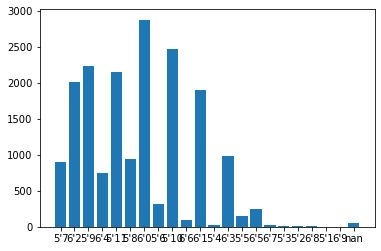

In [24]:
plt.bar(list(height.keys()), list(height.values()))
xlocs=[i+1 for i in range(len(list(height.keys())))]
# for i, v in enumerate(list(height.values())):
#     plt.text(xlocs[i] - 1.75, v + 0.02, str(v))
plt.show()